# **Data Set Information**
- Fashion MNIST is a dataset comprising 60,000 training images and 10,000
testing images, each depicting various fashion items in a 28x28 grayscale format.
- The dataset encompasses ten distinct categories of apparel.


## **Load Libraries**

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import math
import datetime
import platform

In [2]:
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import SGD

In [3]:
# The platform module allows you to access underlying platform data, like OS, architecture, processor, etc.
print("System:", platform.system())
print("Machine:", platform.machine())
print("Platform:", platform.platform())
print("Processor:", platform.processor())
print("Python version:", platform.python_version())

System: Linux
Machine: x86_64
Platform: Linux-6.1.123+-x86_64-with-glibc2.35
Processor: x86_64
Python version: 3.11.12


## **Load Data**

In [40]:
mnist_dataset = fashion_mnist.load_data()

In [41]:
(x_train,y_train),(x_test,y_test) = mnist_dataset

In [42]:
x_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [43]:
print("Shape of X_trian : ",x_train.shape)
print("Shape of Y_trian : ",y_train.shape)
print("Shape of X_test : ",x_test.shape)
print("Shape of Y_test : ",y_test.shape)

Shape of X_trian :  (60000, 28, 28)
Shape of Y_trian :  (60000,)
Shape of X_test :  (10000, 28, 28)
Shape of Y_test :  (10000,)


The **training** dataset consists of `60000 28x28 px` images of hand-written digits from `0` to `9`.

The **test** dataset consists of `10000 28x28 px` images.

In [44]:
print("Train Digit Labels are : ", np.unique(y_train))
print("Test Digit Labels are : ", np.unique(y_test))

Train Digit Labels are :  [0 1 2 3 4 5 6 7 8 9]
Test Digit Labels are :  [0 1 2 3 4 5 6 7 8 9]


## **Visualisation**

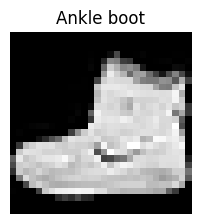

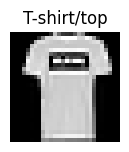

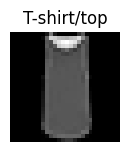

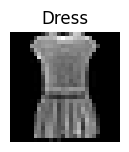

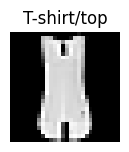

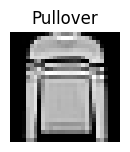

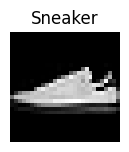

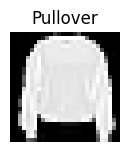

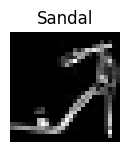

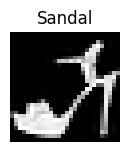

In [45]:
# Class labels
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Visualize sample images
plt.figure(figsize=(10, 5))
for i in range(10):
  plt.subplot(2, 5, i + 1)
  plt.imshow(x_train[i], cmap='gray')
  plt.title(class_names[y_train[i]])
  plt.axis('off')
  plt.tight_layout()
  plt.show()

<ipython-input-46-4592b790ad73>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=label_counts.index, y=label_counts.values, palette='Set2')


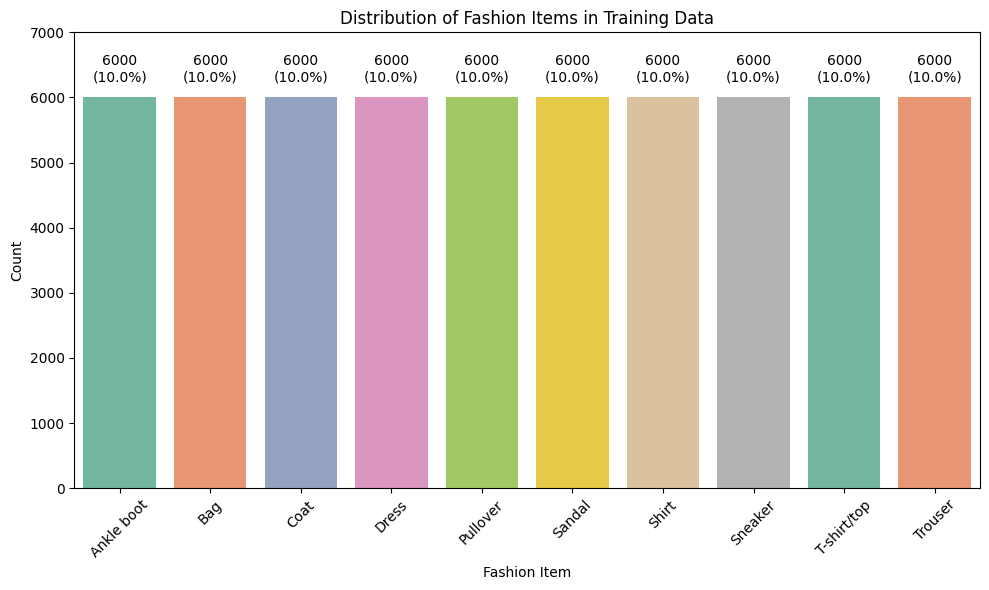

In [46]:
# Class labels
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Convert to DataFrame with class names
df = pd.DataFrame(y_train, columns=['label'])
df['label'] = df['label'].map(lambda x: class_names[x])

# Count and percentages
label_counts = df['label'].value_counts().sort_index()
label_percentages = (label_counts / len(df)) * 100

# Plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=label_counts.index, y=label_counts.values, palette='Set2')

# Annotate counts and percentages
for i, (count, pct) in enumerate(zip(label_counts.values, label_percentages.values)):
    ax.text(i, count + 200, f'{count}\n({pct:.1f}%)', ha='center', va='bottom', fontsize=10)

# Set dynamic y-limit for space
max_count = max(label_counts.values)
plt.ylim(0, max_count + 1000)

plt.title('Distribution of Fashion Items in Training Data')
plt.xlabel('Fashion Item')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


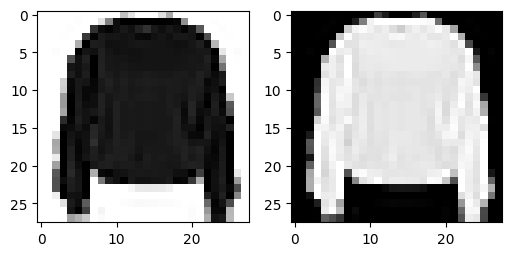

In [47]:
plt.figure(figsize=(6,6))
ax1 = plt.subplot(1,2,1)
ax2 = plt.subplot(1,2,2)
ax1.imshow(x_train[7],cmap=plt.cm.binary)
ax2.imshow(x_train[7],cmap='gray')
plt.show()

## **Normalize**

As the color map ranges from 0 to 255, if we divide all by 255, we get a range of 0 to 1.

In [48]:
# Normalize pixel values to [0, 1]
x_train = x_train / 255.0
x_test = x_test / 255.0
print("Minimum of x_train after normalisation", x_train.min())
print("Maximum of x_train after normalisation", x_train.max())
print("Minimum of x_test after normalisation", x_test.min())
print("Maximum of x_test after normalisation", x_test.max())

# Reshape input data for FCNN (flattened 28x28 images)
x_train = x_train.reshape(-1, 28 * 28)
x_test = x_test.reshape(-1, 28 * 28)

# One-hot encode labels
y_train_encoded = to_categorical(y_train, num_classes=10)
y_test_encoded = to_categorical(y_test, num_classes=10)


# Get class-wise counts
print("y_train class distribution after one-hot encoding:\n", np.sum(y_train_encoded, axis=0).astype(int))
print("y_test class distribution after one-hot encoding:\n", np.sum(y_test_encoded, axis=0).astype(int))
print("the distribution is still the same but values will be different as there are ten classes then each class will be like an array of 9 zeroes and 1 one")

Minimum of x_train after normalisation 0.0
Maximum of x_train after normalisation 1.0
Minimum of x_test after normalisation 0.0
Maximum of x_test after normalisation 1.0
y_train class distribution after one-hot encoding:
 [6000 6000 6000 6000 6000 6000 6000 6000 6000 6000]
y_test class distribution after one-hot encoding:
 [1000 1000 1000 1000 1000 1000 1000 1000 1000 1000]
the distribution is still the same but values will be different as there are ten classes then each class will be like an array of 9 zeroes and 1 one


## **Build The Model**

In [ ]:
model = Sequential([
      Dense(256, activation='relu', input_shape=(784,)),
      Dense(128, activation='relu'),
      Dense(64, activation='relu'),
      Dense(10, activation='softmax')  # 10 classes for output
                  ])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 242,762 (948.29 KB)

 Trainable params: 242,762 (948.29 KB)

 Non-trainable params: 0 (0.00 B)

## **Compile The Model**

In [ ]:
model.compile(
      optimizer=SGD(),
      loss='categorical_crossentropy',
      metrics=['accuracy']
              )

## **Train The Model**

In [ ]:
history = model.fit(
      x_train, y_train_encoded,
      epochs=30,
      batch_size=64,
      validation_split=0.2,
      verbose=2
                      )

Epoch 1/30
750/750 - 8s - 11ms/step - accuracy: 0.6946 - loss: 0.9551 - val_accuracy: 0.7905 - val_loss: 0.6170
Epoch 2/30
750/750 - 8s - 11ms/step - accuracy: 0.8071 - loss: 0.5617 - val_accuracy: 0.8176 - val_loss: 0.5163
Epoch 3/30
750/750 - 3s - 4ms/step - accuracy: 0.8254 - loss: 0.4941 - val_accuracy: 0.8293 - val_loss: 0.4852
Epoch 4/30
750/750 - 3s - 4ms/step - accuracy: 0.8367 - loss: 0.4607 - val_accuracy: 0.8388 - val_loss: 0.4610
Epoch 5/30
750/750 - 7s - 9ms/step - accuracy: 0.8449 - loss: 0.4379 - val_accuracy: 0.8457 - val_loss: 0.4359
Epoch 6/30
750/750 - 4s - 5ms/step - accuracy: 0.8520 - loss: 0.4192 - val_accuracy: 0.8518 - val_loss: 0.4185
Epoch 7/30
750/750 - 3s - 4ms/step - accuracy: 0.8557 - loss: 0.4064 - val_accuracy: 0.8565 - val_loss: 0.4062
Epoch 8/30
750/750 - 6s - 8ms/step - accuracy: 0.8605 - loss: 0.3941 - val_accuracy: 0.8503 - val_loss: 0.4209
Epoch 9/30
750/750 - 4s - 5ms/step - accuracy: 0.8643 - loss: 0.3843 - val_accuracy: 0.8583 - val_loss: 0.3976

In [ ]:
loss, accuracy = model.evaluate(x_test, y_test_encoded)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8794 - loss: 0.3480
Test Loss: 0.3499
Test Accuracy: 0.8759


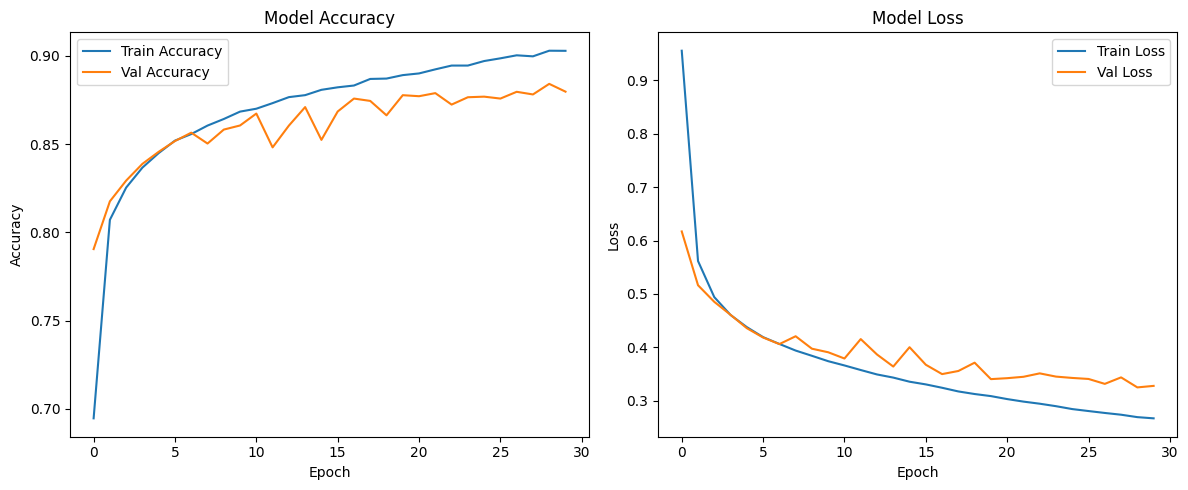

In [ ]:
# Plot Accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend()

plt.tight_layout()
plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


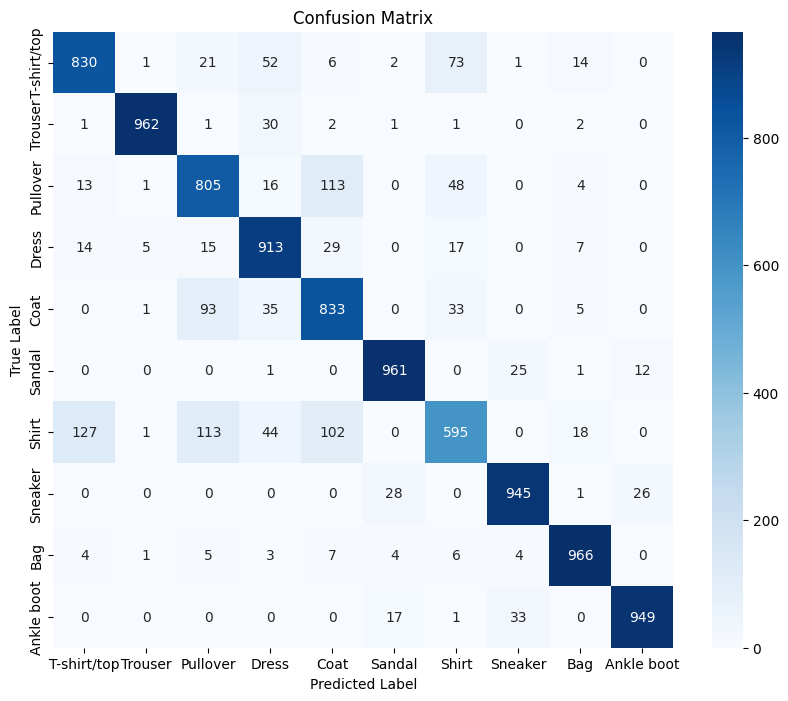

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Predict and get class labels
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test_encoded, axis=1)

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
